In [50]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123425 sha256=239215ff6d582beff25984c09db4749a2c1c854755b7e366b3c7ac0b8c91b96d
  Stored in directory: /tmp/pip-ephem-wheel-cache-1tcpxz63/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos5_nodes.sg",
                      path_links=path_directory + "erdos5_links.sg")
S.describe()

Nb of Nodes :  10
Nb of segmented nodes :  10.0
Nb of links :  38
Nb of segmented links :  52.0
Nb of event times :  42


In [2]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


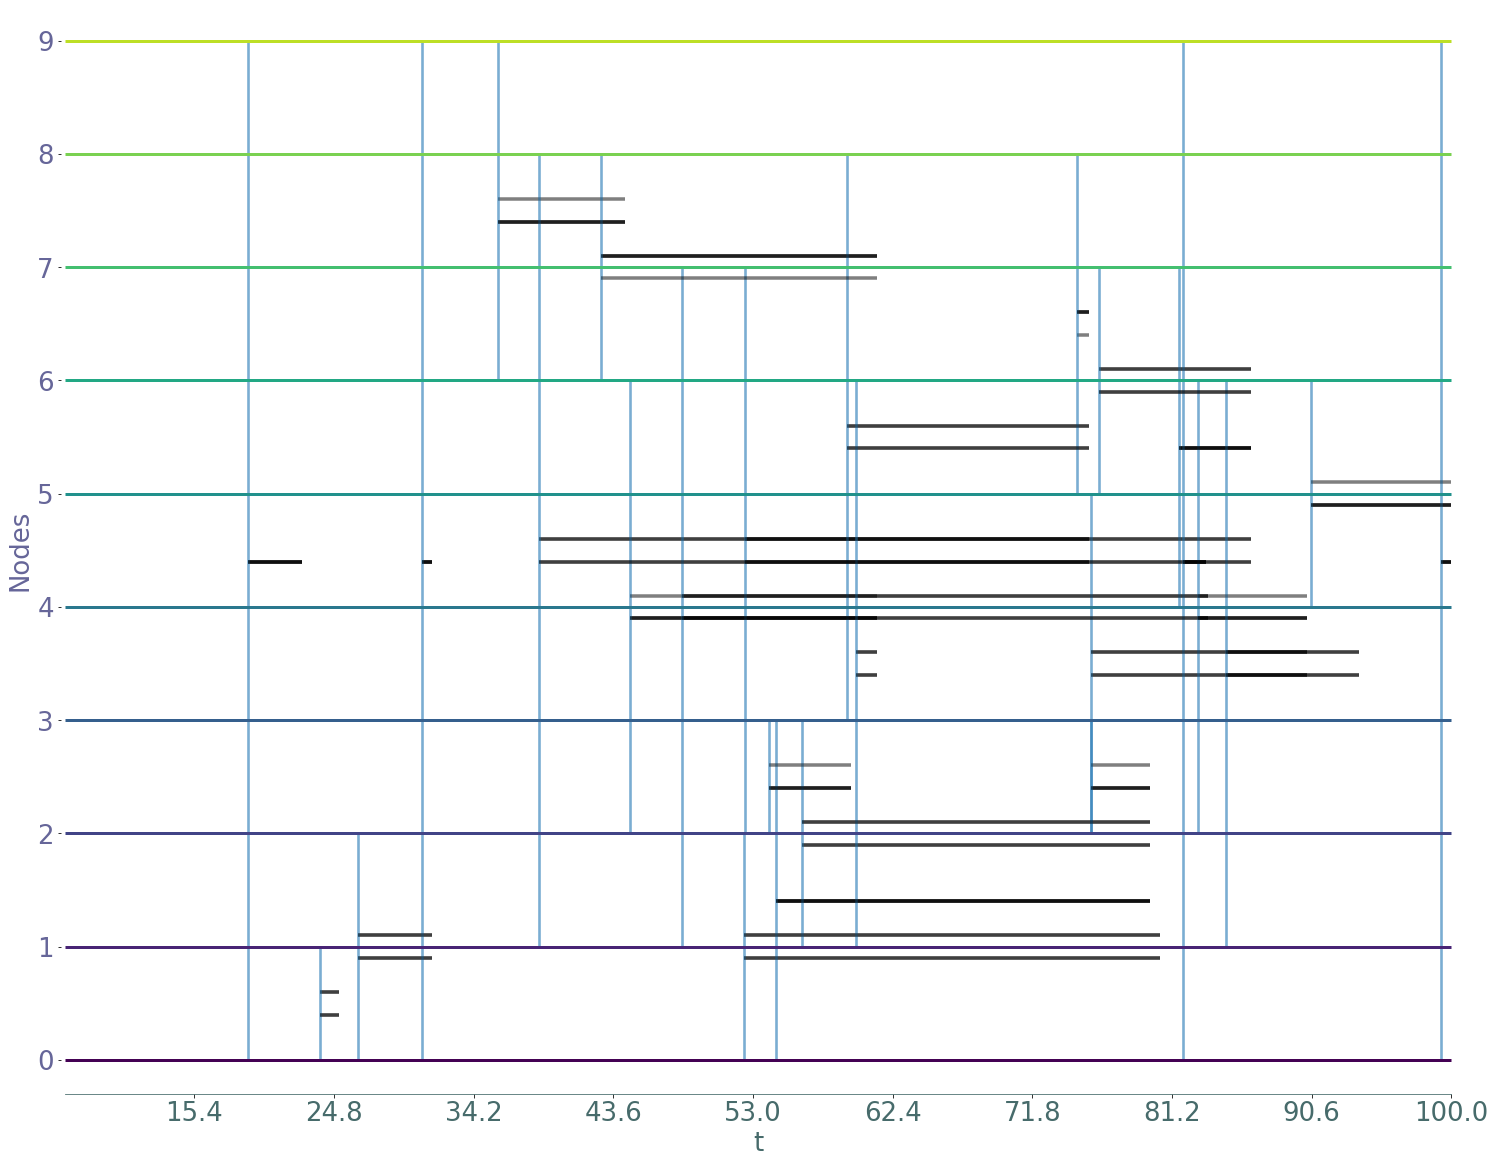

In [3]:
S.plot()

In [4]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [5]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [6]:
events, events_reverse = bt.events_dic(nouveau)

In [7]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
node = 8

In [9]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [10]:
cur_best[5][43.20861816893123]

KeyError: 43.20861816893123

In [11]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [12]:
lat_triplet[1]

[[38.63106480839467, 38.63106480839467, 1],
 [42.80254801228882, 42.80254801228882, 1],
 [44.366589142806795, 44.366589142806795, 1],
 [44.6890894123902, 44.6890894123902, 1],
 [48.193417313173406, 48.193417313173406, 1],
 [52.399105148503374, 52.399105148503374, 1],
 [52.49073257040008, 52.49073257040008, 1],
 [54.07400826577283, 54.07400826577283, 1],
 [54.52519781573363, 54.52519781573363, 1],
 [56.28480941635639, 56.28480941635639, 1],
 [59.34925517493079, 59.34925517493079, 1],
 [59.629901380901956, 59.629901380901956, 1],
 [59.94215142732125, 59.94215142732125, 1],
 [61.35534226382198, 61.35534226382198, 1],
 [74.82282625952246, 74.82282625952246, 1],
 [75.61304700994472, 75.61304700994472, 1]]

In [13]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

********** (38.63106480839467, 42.80254801228882) **************
[(6, 42.80254801228882), (9, 42.80254801228882)]
///////////////////////
(9, 42.80254801228882) {} {(9, 42.80254801228882)}
(6, 42.80254801228882) {} {(6, 42.80254801228882)}
(9, 42.80254801228882) {} {(6, 42.80254801228882)}
********** (42.80254801228882, 44.366589142806795) **************
[(6, 44.366589142806795), (9, 44.366589142806795)]
///////////////////////
(9, 44.366589142806795) {} {(9, 44.366589142806795)}
(6, 44.366589142806795) {} {(6, 44.366589142806795)}
(9, 44.366589142806795) {} {(6, 44.366589142806795)}
********** (44.6890894123902, 48.193417313173406) **************
[(6, 48.193417313173406), (2, 48.193417313173406)]
///////////////////////
(2, 48.193417313173406) {} {(2, 48.193417313173406)}
(6, 48.193417313173406) {} {(6, 48.193417313173406)}
(2, 48.193417313173406) {} {(6, 48.193417313173406)}
********** (48.193417313173406, 52.399105148503374) **************
[(6, 52.399105148503374), (2, 52.3991051485

In [14]:
import networkx as nx
GD = Gp[(70.95868453710477, 72.13340058339028)].graph
ren = dict()
for e in GD.nodes:
    ren[e] = (nouveau.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

KeyError: (70.95868453710477, 72.13340058339028)

In [15]:
Gp[(41.18266119186523, 43.20861816893123)].graph[(6, 21.858121399769864)]

KeyError: (41.18266119186523, 43.20861816893123)

In [16]:
for e in Gp[(41.18266119186523, 43.20861816893123)].edges():
    print(e, Gp[(41.18266119186523, 43.20861816893123)].graph[e[0]][e[1]]['weight'])

KeyError: (41.18266119186523, 43.20861816893123)

In [17]:
Gp[(41.18266119186523, 43.20861816893123)].graph[(3, 43.20861816893123)]

KeyError: (41.18266119186523, 43.20861816893123)

In [18]:
Gp[(41.18266119186523, 43.20861816893123)].graph[(3, 43.20861816893123)]

KeyError: (41.18266119186523, 43.20861816893123)

In [19]:
GT[(41.18266119186523, 43.20861816893123)].graph[(6, 21.858121399769864)]

KeyError: (41.18266119186523, 43.20861816893123)

In [20]:
for e in GT[(41.18266119186523, 43.20861816893123)].edges():
    print(e)

KeyError: (41.18266119186523, 43.20861816893123)

In [21]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(5,43.20861816893123)):
        print(path)

In [22]:
sigma_r[ (5, 43.20861816893123)]

NameError: name 'sigma_r' is not defined

In [23]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [24]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [25]:
cur_best[4]

{6.703571341911507: (-inf, inf),
 19.016632877584268: (-inf, inf),
 22.67319976189898: (-inf, inf),
 23.863822474044515: (-inf, inf),
 25.160559466610902: (-inf, inf),
 26.42284836674213: (-inf, inf),
 30.727350161612218: (-inf, inf),
 31.370672546862984: (-inf, inf),
 35.86844093553039: (-inf, inf),
 38.63106480839467: (-inf, inf),
 42.80254801228882: (-inf, inf),
 44.366589142806795: (-inf, inf),
 44.6890894123902: (-inf, inf),
 48.193417313173406: (-inf, inf),
 52.399105148503374: (-inf, inf),
 52.49073257040008: (-inf, inf),
 54.07400826577283: (-inf, inf),
 54.52519781573363: (-inf, inf),
 56.28480941635639: (-inf, inf),
 59.34925517493079: (-inf, inf),
 59.629901380901956: (-inf, inf),
 59.94215142732125: (-inf, inf),
 61.35534226382198: (-inf, inf),
 74.82282625952246: (-inf, inf),
 75.61304700994472: (-inf, inf),
 75.77929590398148: (-inf, inf),
 75.78026622745247: (-inf, inf),
 76.31767987524688: (-inf, inf),
 79.73349567329026: (-inf, inf),
 80.41206683462686: (-inf, inf),
 8

In [26]:
pre[0]

{6.703571341911507: {},
 19.016632877584268: {},
 22.67319976189898: {},
 23.863822474044515: {},
 25.160559466610902: {},
 26.42284836674213: {},
 30.727350161612218: {},
 31.370672546862984: {},
 35.86844093553039: {},
 38.63106480839467: {},
 42.80254801228882: {},
 44.366589142806795: {},
 44.6890894123902: {},
 48.193417313173406: {},
 52.399105148503374: {(2, 52.399105148503374): (52.399105148503374,
   52.399105148503374)},
 52.49073257040008: {(2, 52.49073257040008): (52.399105148503374,
   52.49073257040008)},
 54.07400826577283: {(2, 54.07400826577283): (52.49073257040008,
   54.07400826577283)},
 54.52519781573363: {(2, 54.52519781573363): (54.07400826577283,
   54.52519781573363)},
 56.28480941635639: {(2, 56.28480941635639): (54.52519781573363,
   56.28480941635639),
  (3, 56.28480941635639): (54.52519781573363, 56.28480941635639)},
 59.34925517493079: {(3, 59.34925517493079): (56.28480941635639,
   59.34925517493079)},
 59.629901380901956: {(3, 59.629901380901956): (59.34

In [27]:
nouveau.link_presence[2]

[90.53992393702464,
 93.82458263820659,
 93.82458263820659,
 99.28829648357686,
 99.28829648357686,
 100.0]

In [28]:
edge = bt.edges(nouveau)

In [29]:
edge[0][3]

{54.52519781573363: (54.52519781573363, 54.52519781573363),
 56.28480941635639: (54.52519781573363, 56.28480941635639),
 59.34925517493079: (56.28480941635639, 59.34925517493079),
 59.629901380901956: (59.34925517493079, 59.629901380901956),
 59.94215142732125: (59.629901380901956, 59.94215142732125),
 61.35534226382198: (59.94215142732125, 61.35534226382198),
 74.82282625952246: (61.35534226382198, 74.82282625952246),
 75.61304700994472: (74.82282625952246, 75.61304700994472),
 75.77929590398148: (75.61304700994472, 75.77929590398148),
 75.78026622745247: (75.77929590398148, 75.78026622745247),
 76.31767987524688: (75.78026622745247, 76.31767987524688),
 79.73349567329026: (76.31767987524688, 79.73349567329026)}

In [30]:
edge[3][4]

KeyError: 4

In [31]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

8 1 38.63106480839467 -1 -1 -1 -1
edge after 38.63106480839467 42.80254801228882
t1p,t2p 38.63106480839467 38.63106480839467
8 1 42.80254801228882 -1 -1 -1 -1
edge after 42.80254801228882 44.366589142806795
t1p,t2p 38.63106480839467 42.80254801228882
8 6 42.80254801228882 38.63106480839467 42.80254801228882 42.80254801228882 44.366589142806795
edge after 42.80254801228882 44.366589142806795
t1p,t2p 42.80254801228882 42.80254801228882
6 9 42.80254801228882 38.63106480839467 42.80254801228882 42.80254801228882 44.366589142806795
edge after 42.80254801228882 44.366589142806795
t1p,t2p 38.63106480839467 42.80254801228882
8 1 44.366589142806795 -1 -1 -1 -1
edge after 44.366589142806795 44.6890894123902
t1p,t2p 42.80254801228882 44.366589142806795
8 6 44.366589142806795 42.80254801228882 44.366589142806795 44.366589142806795 44.6890894123902
edge after 44.366589142806795 44.6890894123902
t1p,t2p 42.80254801228882 44.366589142806795
6 9 44.366589142806795 42.80254801228882 44.366589142806795 

In [32]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [33]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [34]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [35]:
after[4]

{6.703571341911507: False,
 19.016632877584268: False,
 22.67319976189898: False,
 23.863822474044515: False,
 25.160559466610902: False,
 26.42284836674213: False,
 30.727350161612218: False,
 31.370672546862984: False,
 35.86844093553039: False,
 38.63106480839467: False,
 42.80254801228882: False,
 44.366589142806795: False,
 44.6890894123902: False,
 48.193417313173406: False,
 52.399105148503374: False,
 52.49073257040008: False,
 54.07400826577283: False,
 54.52519781573363: False,
 56.28480941635639: False,
 59.34925517493079: False,
 59.629901380901956: False,
 59.94215142732125: False,
 61.35534226382198: False,
 74.82282625952246: False,
 75.61304700994472: False,
 75.77929590398148: False,
 75.78026622745247: False,
 76.31767987524688: False,
 79.73349567329026: False,
 80.41206683462686: False,
 81.68006613089698: False,
 81.92135944064438: False,
 82.92690772790067: False,
 83.50541974915897: False,
 83.62919116685474: False,
 84.87161137882042: False,
 86.55141945299945: 

In [36]:
before[4]

{6.703571341911507: False,
 19.016632877584268: False,
 22.67319976189898: False,
 23.863822474044515: False,
 25.160559466610902: False,
 26.42284836674213: False,
 30.727350161612218: False,
 31.370672546862984: False,
 35.86844093553039: False,
 38.63106480839467: False,
 42.80254801228882: False,
 44.366589142806795: False,
 44.6890894123902: False,
 48.193417313173406: False,
 52.399105148503374: False,
 52.49073257040008: False,
 54.07400826577283: False,
 54.52519781573363: False,
 56.28480941635639: False,
 59.34925517493079: False,
 59.629901380901956: False,
 59.94215142732125: False,
 61.35534226382198: False,
 74.82282625952246: False,
 75.61304700994472: False,
 75.77929590398148: False,
 75.78026622745247: False,
 76.31767987524688: False,
 79.73349567329026: False,
 80.41206683462686: False,
 81.68006613089698: False,
 81.92135944064438: False,
 82.92690772790067: False,
 83.50541974915897: False,
 83.62919116685474: False,
 84.87161137882042: False,
 86.55141945299945: 

In [37]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [38]:
sigma_r

{(0, 6.703571341911507): vol(0,0),
 (0, 19.016632877584268): vol(0,0),
 (0, 22.67319976189898): vol(0,0),
 (0, 23.863822474044515): vol(0,0),
 (0, 25.160559466610902): vol(0,0),
 (0, 26.42284836674213): vol(0,0),
 (0, 30.727350161612218): vol(0,0),
 (0, 31.370672546862984): vol(0,0),
 (0, 35.86844093553039): vol(0,0),
 (0, 38.63106480839467): vol(0,0),
 (0, 42.80254801228882): vol(0,0),
 (0, 44.366589142806795): vol(0,0),
 (0, 44.6890894123902): vol(0,0),
 (0, 48.193417313173406): vol(0,0),
 (0, 52.399105148503374): vol(1,0),
 (0, 52.49073257040008): vol(1,0),
 (0, 54.07400826577283): vol(1,0),
 (0, 54.52519781573363): vol(1,0),
 (0, 56.28480941635639): vol(2,0),
 (0, 59.34925517493079): vol(1,0),
 (0, 59.629901380901956): vol(1,0),
 (0, 59.94215142732125): vol(1,0),
 (0, 61.35534226382198): vol(1,0),
 (0, 74.82282625952246): vol(1,0),
 (0, 75.61304700994472): vol(1,0),
 (0, 75.77929590398148): vol(0.16624889403675525,1),
 (0, 75.78026622745247): vol(0.16721921750774982,1),
 (0, 76.317

In [59]:
lat_triplet[5]

[[74.82282625952246, 74.82282625952246, 1],
 [75.61304700994472, 75.61304700994472, 1]]

In [55]:
contri[5]

{74.82282625952246: (6.703571341911507, 74.82282625952246),
 75.61304700994472: (75.61304700994472, 100.0)}

In [60]:
sigma_r[(5, 75.61304700994472)]

vol(1,0)

In [41]:
GG.l_nei[(1, 79.96710253478658)]

KeyError: (1, 79.96710253478658)

In [42]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [43]:
prev_next[4]

{}

In [44]:
contri[6]

{42.80254801228882: (6.703571341911507, 42.80254801228882),
 44.366589142806795: (44.366589142806795, 44.366589142806795),
 44.6890894123902: (44.6890894123902, 44.6890894123902),
 48.193417313173406: (48.193417313173406, 48.193417313173406),
 52.399105148503374: (52.399105148503374, 52.399105148503374),
 52.49073257040008: (52.49073257040008, 52.49073257040008),
 54.07400826577283: (54.07400826577283, 54.07400826577283),
 54.52519781573363: (54.52519781573363, 54.52519781573363),
 56.28480941635639: (56.28480941635639, 56.28480941635639),
 59.34925517493079: (59.34925517493079, 59.34925517493079),
 59.629901380901956: (59.629901380901956, 59.629901380901956),
 59.94215142732125: (59.94215142732125, 59.94215142732125),
 61.35534226382198: (61.35534226382198, 100.0),
 82.92690772790067: (61.35534226382198, 100.0)}

In [45]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [46]:
deltasvvt

{(2, 52.399105148503374): vol(0,0),
 (0, 52.399105148503374): vol(0,0),
 (2, 52.49073257040008): vol(0,0),
 (0, 52.49073257040008): vol(0,0),
 (2, 54.07400826577283): vol(0,0),
 (0, 54.07400826577283): vol(0,0),
 (2, 54.52519781573363): vol(0,0),
 (0, 54.52519781573363): vol(0,0),
 (2, 56.28480941635639): vol(0,0),
 (0, 56.28480941635639): vol(0,0),
 (3, 56.28480941635639): vol(0,0),
 (3, 59.34925517493079): vol(0,0),
 (0, 59.34925517493079): vol(0,0),
 (3, 59.629901380901956): vol(0,0),
 (0, 59.629901380901956): vol(0,0),
 (3, 59.94215142732125): vol(0,0),
 (0, 59.94215142732125): vol(0,0),
 (3, 61.35534226382198): vol(0,0),
 (0, 61.35534226382198): vol(0,0),
 (3, 74.82282625952246): vol(0,0),
 (0, 74.82282625952246): vol(0,0),
 (3, 75.61304700994472): vol(0,0),
 (0, 75.61304700994472): vol(0,0),
 (0, 75.77929590398148): vol(0,0),
 (0, 75.78026622745247): vol(0,0),
 (0, 76.31767987524688): vol(0,0),
 (0, 79.73349567329026): vol(0,0),
 (8, 38.63106480839467): vol(0,0),
 (1, 38.63106480

In [47]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

w_tp 6 82.92690772790067 ii 0 partial_sum {83.62919116685474: vol(0,0), 83.50541974915897: vol(0,0), 82.92690772790067: vol(173.39685837772427,0)}
w_tp 6 82.92690772790067 partial_sum[l_nei[v,t][ii][0]] vol(173.39685837772427,0) contrib_local[v][event[jjj]] vol(173.39685837772427,0)


In [48]:
contribution

{1: {38.63106480839467: vol(0,0),
  42.80254801228882: vol(0,0),
  44.366589142806795: vol(0,0),
  44.6890894123902: vol(0,0),
  48.193417313173406: vol(0,0),
  52.399105148503374: vol(0,0),
  52.49073257040008: vol(0,0),
  54.07400826577283: vol(0,0),
  54.52519781573363: vol(0,0),
  56.28480941635639: vol(0,0),
  59.34925517493079: vol(0,0),
  59.629901380901956: vol(0,0),
  59.94215142732125: vol(0,0),
  61.35534226382198: vol(0,0),
  74.82282625952246: vol(0,0),
  93.82458263820659: vol(0,0),
  90.53992393702464: vol(0,0),
  90.29655014270881: vol(0,0),
  86.55141945299945: vol(0,0),
  84.87161137882042: vol(0,0),
  83.62919116685474: vol(0,0),
  83.50541974915897: vol(0,0),
  82.92690772790067: vol(0,0),
  81.92135944064438: vol(0,0),
  81.68006613089698: vol(0,0),
  80.41206683462686: vol(140.05487267404152,0),
  79.73349567329026: vol(215.00538556535727,0),
  76.31767987524688: vol(592.2939598415314,0),
  75.78026622745247: vol(651.6531410623261,0),
  75.77929590398148: vol(651.

In [49]:
contribution[5]

{74.82282625952246: vol(0,0),
 90.29655014270881: vol(0,0),
 86.55141945299945: vol(0,0),
 84.87161137882042: vol(0,0),
 83.62919116685474: vol(0,0),
 83.50541974915897: vol(0,0),
 82.92690772790067: vol(0,0),
 81.92135944064438: vol(22.050012616408843,0),
 81.68006613089698: vol(26.194469040832413,0),
 80.41206683462686: vol(188.56181397995277,0),
 79.73349567329026: vol(277.2162754389581,0),
 76.31767987524688: vol(729.4080467040089,0),
 75.78026622745247: vol(741.1926401086981,0),
 75.77929590398148: vol(741.2139176992908,0),
 75.61304700994472: vol(741.2139176992908,0),
 6.703571341911507: vol(0,0),
 19.016632877584268: vol(0,0),
 22.67319976189898: vol(0,0),
 23.863822474044515: vol(0,0),
 25.160559466610902: vol(0,0),
 26.42284836674213: vol(0,0),
 30.727350161612218: vol(0,0),
 31.370672546862984: vol(0,0),
 35.86844093553039: vol(0,0),
 38.63106480839467: vol(0,0),
 42.80254801228882: vol(0,0),
 44.366589142806795: vol(0,0),
 44.6890894123902: vol(0,0),
 48.193417313173406: vol